## Fitness estimation for model generated networks

#### Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.insert(0, '../')
from src import model
from src import fitness
from src import utils

#### Estimation for uniform distribution

In [2]:
# Parameters
size = 5000
iterations = 100

# Generate random uniform fitness values
rng = np.random.default_rng(1234)
fitness_data = rng.random(size)

times, node_degrees = utils.simulate(size, iterations, fitness_data)

mean_degrees_uniform = utils.get_means(node_degrees)
degrees_new, times_new = mean_degrees_uniform, times[0]

beta = utils.estimate_beta(degrees_new, times_new)

/Users/aarondeclercq/Desktop/bb/notebooks/../src/utils.py:130: RuntimeWarning: divide by zero encountered in log
  lnt = [np.log(t) for t in times]
/opt/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


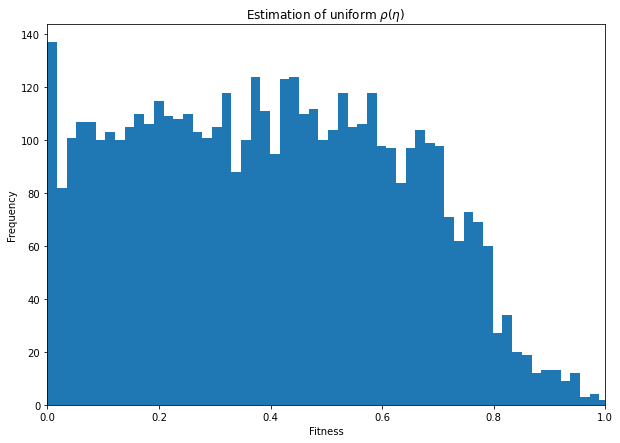

In [4]:
# Plotting the fitness (beta) distribution histogram
plt.figure(figsize=(10,7))
plt.hist(beta, bins=100)
plt.xlabel('Fitness')
plt.ylabel('Frequency')
plt.title(r'Estimation of uniform $ \rho(\eta) $ ')
plt.xlim(0,1)
plt.savefig('../results/uniform_fitness_estimation.png', dpi=300)

#### Estimation for exponential distribution

In [5]:
# Generate random exponential fitness values
rng = np.random.default_rng(1234)
fitness_data = rng.exponential(1.0, size)

times, node_degrees = utils.simulate(size, iterations, fitness_data)

mean_degrees = utils.get_means(node_degrees)
degrees_new, times_new = mean_degrees, times[0]

beta = utils.estimate_beta(degrees_new, times_new)

/Users/aarondeclercq/Desktop/bb/notebooks/../src/utils.py:130: RuntimeWarning: divide by zero encountered in log
  lnt = [np.log(t) for t in times]
/opt/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


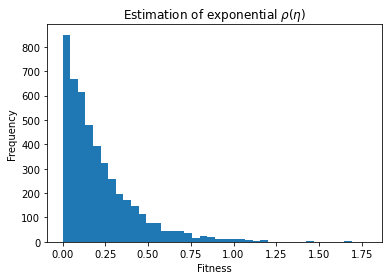

In [6]:
plt.figure(figsize=(10,7))
plt.hist(beta, bins=40)
plt.xlabel('Fitness')
plt.ylabel('Frequency')
plt.title(r'Estimation of exponential $ \rho(\eta) $ ')
plt.savefig('../results/exp_fitness_estimation.png', dpi=300)

#### Estimation for beta distribution

In [12]:
size = 3000
iterations = 20

# Generate values from beta distribution
generator = fitness.generator()

generator.set_current_distribution('beta')
generator.set_param_beta(2, 2)

y_samples = []
for _ in range(size):
    y_samples.append(generator.generate_value())

fitness_data = y_samples

# Estimate distribution
times, node_degrees = utils.simulate(size, iterations, fitness_data)

mean_degrees = utils.get_means(node_degrees)

degrees_new, times_new = mean_degrees, times[0]

beta = utils.estimate_beta(degrees_new, times_new)

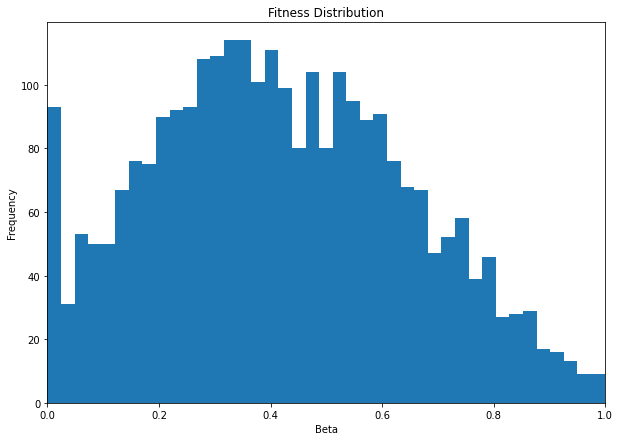

In [13]:
plt.figure(figsize=(10,7))
plt.hist(beta, bins=300)
plt.xlabel('Beta')
plt.ylabel('Frequency')
plt.title('Fitness Distribution')
plt.xlim(0, 1)
plt.savefig('../results/beta_fitness_estimation.png')

#### Estimation for Bose-Einstein fitness distribution

In [9]:
# Generate values
generator = fitness.generator()
generator.set_current_distribution('be')

n_samples = 5000
y_samples = []

for _ in range(n_samples):
    y_samples.append(generator.generate_value())

fitness_data = y_samples


size = n_samples
iterations = 100

times, node_degrees = utils.simulate(size, iterations, fitness_data)
mean_degrees_be = utils.get_means(node_degrees)
degrees_new, times_new = mean_degrees_be, times[0]

beta = utils.estimate_beta(degrees_new, times_new)

/Users/aarondeclercq/Desktop/bb/notebooks/../src/utils.py:130: RuntimeWarning: divide by zero encountered in log
  lnt = [np.log(t) for t in times]
/opt/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


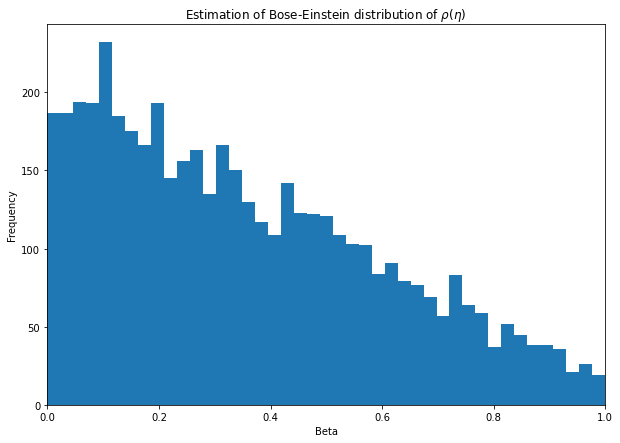

In [11]:
plt.figure(figsize=(10,7))
plt.hist(beta, bins=100)
plt.xlabel('Beta')
plt.ylabel('Frequency')
plt.title(r'Estimation of Bose-Einstein distribution of $ \rho(\eta) $ ')
plt.xlim(0, 1)
plt.savefig('../results/be_fitness_estimation.png', dpi=300)